<a href="https://colab.research.google.com/github/NahrifahRizkyNamira/deteksi-tulisan-tangan-UAS-CNN/blob/main/model_deteksi_tulisan_tangan_UAS_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
print("Python siap")

Python siap


In [20]:
import tensorflow as tf
print("Tensorflow version:",
tf.__version__)

Tensorflow version: 2.19.0


In [21]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("jumlah data training:", x_train.shape)
print("jumlah data testing:", x_test.shape)

jumlah data training: (60000, 28, 28)
jumlah data testing: (10000, 28, 28)


In [22]:
# Normalisasi pixel
x_train = x_train / 255.0
x_test = x_test / 255.0

# Ubah shape agar cocok untuk CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Shape x_train:", x_train.shape)
print("Shape x_test:", x_test.shape)

Shape x_train: (60000, 28, 28, 1)
Shape x_test: (10000, 28, 28, 1)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3),
activation='relu',
input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3),
activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer='adam',
loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9011 - loss: 0.3155 - val_accuracy: 0.9850 - val_loss: 0.0463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9855 - loss: 0.0464 - val_accuracy: 0.9885 - val_loss: 0.0331
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9907 - loss: 0.0306 - val_accuracy: 0.9907 - val_loss: 0.0283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9924 - loss: 0.0230 - val_accuracy: 0.9906 - val_loss: 0.0295
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9942 - loss: 0.0192 - val_accuracy: 0.9902 - val_loss: 0.0328


In [25]:
from google.colab import files
uploaded = files .upload()

Saving foto deteksi tangan.jpeg to foto deteksi tangan (1).jpeg


(np.float64(-0.5), np.float64(719.5), np.float64(1599.5), np.float64(-0.5))

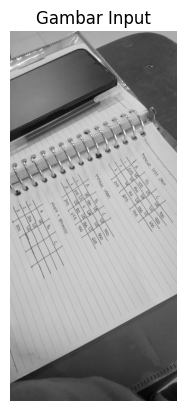

In [26]:
import matplotlib.pyplot as plt
import cv2

image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path,
cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Gambar Input")
plt.axis('off')

In [27]:
img = cv2.resize(img, (28, 28))
img = img / 255.0
img = img.reshape(1, 28, 28, 1)

In [28]:
prediction = model.predict(img)
hasil = prediction.argmax()
print("Hasil deteksi tulisan tangan:",hasil)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Hasil deteksi tulisan tangan: 0


In [29]:
model.save("model_deteksi_tulisan_tangan.h5")
print("Model berhasil disimpan")

Model berhasil disimpan


In [33]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Akurasi model:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9870 - loss: 0.0407
Akurasi model: 0.9901999831199646


In [34]:
if prediction.max() > 0.7:
  print("Tulisan tangan terdeteksi")
else:
  print("Bukan tulisan tangan")

Bukan tulisan tangan
